# Лабораторная работа 4 (вариант 11)

## Решение краевой задачи методом прогонки 

Выполнил: Шумаков Иван

### Постановка задачи

Необходимо решить уравнение теплопроводности:

$$
\frac{d}{dx} [k(x) \frac{du}{dx}] -q(x) u = -f(x)  \\
q(x) = x^2 \\
f(x) = cos (x)
$$

при этом функция k(x) испытывает разрыв в точке $x_0 = 0.125$:

$$
x < x_0: k(x) = x + 1 \\
x > x_0: k(x) = x^2
$$

условия на решение в точке разрыва:

$$
\begin{cases}
  u(x_0 - 0) = u(x_0 + 0) \\
  k(x_0 - 0) * \frac{du}{dx}(x_0 - 0) = k(x_0 + 0) \frac{du}{dx}(x_0 + 0)
\end{cases}
$$

### Разностная задача

Перейдем к разностным задачам, поставленным при $x > x_0$ и $x < x_0$:

$$
[\frac{d}{dx}k(x) \frac{du}{dx}]|_{x = x_l} \approx \frac{(k_\alpha)_{l + 1/2} \frac{u_{l+1} - u_{l}}{h} - (k_\alpha)_{l-1/2}\frac{u_l - u_{l-1}}{h}}{h} \\
k(\alpha) = x + 1 \\
[\frac{d}{dx}k(x) \frac{du}{dx}]|_{x = x_l} \approx \frac{(k_\beta)_{l + 1/2} \frac{u_{l+1} - u_{l}}{h} - (k_\beta)_{l-1/2}\frac{u_l - u_{l-1}}{h}}{h} \\
k(\beta) = x^2
$$

Для получения полной системы надо добавить краевые условия и условия сшивки(разрыв находится между точками $l_\alpha$ и $l_\beta$):

$$
\begin{cases}
u_0 = 1 \\
u_{l_\alpha} = u_{l_\beta} - сшивка \\
(k_\alpha)_{l_\alpha} \frac{u_{l_\alpha} - u_{l_{\alpha-1}}}{h} = 
(k_\beta)_{l_\beta} \frac{u_{l_{\beta+1}} - u_{l_\beta}}{h} \\
u_L = 0
\end{cases}
$$

Преобразуем систему к трехдиагональному виду:

$$
l = [1, l_\alpha - 1] : \\
\begin{cases}
a_l = (k_\alpha)_{l+1/2} \\
b_l = - [(k_\alpha)_{l + 1/2} + (k_\alpha)_{l - 1/2} + q_l h^2] \\
c_l = (k_\alpha)_{l - 1/2} \\
d_l = - (f_\alpha) h^2
\end{cases} \\
Система: \\
\begin{cases}
u_0 = 1 \\
a_l u_{l + 1}+ b_l u_l + c_l u_{l - 1} = d_l \\
u_{l_\alpha} = u_{l_\beta} \\
(k_\alpha)_{l_\alpha} (u_{l_\alpha} - u_{l_{\alpha-1}}) = 
(k_\beta)_{l_\beta} (u_{l_{\beta+1}} - u_{l_{\beta}}) \\
u_L = 0
\end{cases}
$$

### Метод встречной прогонки

Поскольку уравнение имеет особенность в промежуточной точке, необходимо отдельно посчитать коэффициенты матрицы в ней. Для этого надо запустить прогонку с двух концов матрицы:

$$
l = [2, l_\alpha - 1] : \\
\begin{cases}
u_1 = -\frac{a_1}{b_1} u_2 + \frac{d_1 - c_1 u_0}{b_1} \\
\alpha _l = -\frac{a_l}{b_l + c_l \alpha_{l-1}} \\
\beta _l =  \frac{d_l - c_l \beta_{l-1}}{b_l + c_l \alpha_{l-1}} \\
u_l = \alpha _l u_{l+1} + \beta_l  \\
\end{cases}
$$

Проонка второй системы проводится в другую сторону
$$
l = [L-2, l_\beta + 1] : \\
\begin{cases}
u_{L -1} = -\frac{c_{L-1}}{b_{L-1}}u_{L-2} + \frac{d_{L -1} - c_{L-1} u_L}{b_{L-1}} \\
\alpha _l = -\frac{c_l}{b_l + a_l \alpha_{l+1}} \\
\beta _l =  \frac{d_l - a_l \beta_{l+1}}{b_l + a_l \alpha_{l+1}} \\
u_l = \alpha _l u_{l-1} + \beta_l  \\
\end{cases}
$$

В точке разрыва:

$$
u_{l_\alpha} = u_{l_\beta} = \frac{(k_\alpha)_{l_\alpha} \beta _{l_{\alpha-1}} + (k_\beta)_{l_\beta} \beta _{l_{\beta+1}}}{(k_\alpha)_{l_\alpha} (1 - \alpha _{l_{\alpha-1}}) + (k_\beta)_{l_\beta} (1 - \alpha_{l_{\beta + 1}})}
$$

### Решение

Решение методом прогонки:


[1.00000000e+00 4.97574252e-01 3.30158117e-01 2.46493248e-01
 1.96328003e-01 1.62911851e-01 1.39066010e-01 1.21201102e-01
 1.07323038e-01 9.62353748e-02 8.71767486e-02 7.96395900e-02
 1.00598554e+00 1.00598554e+00 8.34223103e-02 7.42819038e-02
 6.65411472e-02 5.99217434e-02 5.42125141e-02 4.92506291e-02
 4.49087406e-02 4.10859785e-02 3.77015266e-02 3.46899631e-02
 3.19978281e-02 2.95810605e-02 2.74030586e-02 2.54331969e-02
 2.36456784e-02 2.20186389e-02 2.05334402e-02 1.91741096e-02
 1.79268899e-02 1.67798764e-02 1.57227228e-02 1.47463998e-02
 1.38429968e-02 1.30055582e-02 1.22279467e-02 1.15047297e-02
 1.08310829e-02 1.02027103e-02 9.61577502e-03 9.06684157e-03
 8.55282581e-03 8.07095245e-03 7.61871832e-03 7.19386073e-03
 6.79433001e-03 6.41826576e-03 6.06397608e-03 5.72991942e-03
 5.41468875e-03 5.11699759e-03 4.83566777e-03 4.56961855e-03
 4.31785709e-03 4.07946992e-03 3.85361543e-03 3.63951711e-03
 3.43645759e-03 3.24377329e-03 3.06084960e-03 2.88711658e-03
 2.72204513e-03 2.565143

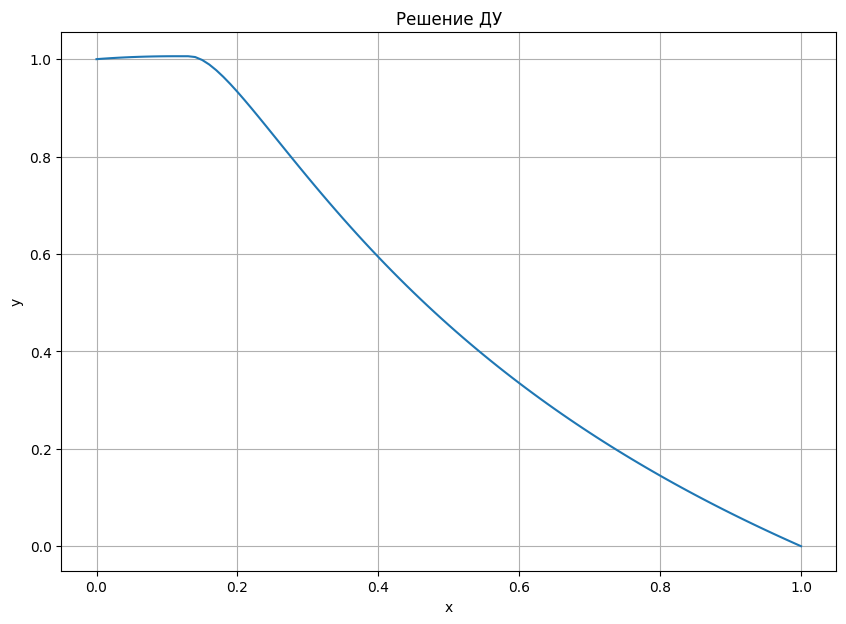

In [3]:
import Progon as solver
import Main as main

import numpy as np
import math as mh
import matplotlib.pyplot as plt

u_0 = 1
u_L = 0
x_0 = 0
x_L = 1
x_singul = 0.125
h = 0.01
alpha = int(x_singul / h)
k_alpha = main.func.k_a(x_0 + alpha * h)
k_beta = main.func.k_b(x_0 + (alpha + 1) * h)
A = main.calc_coefs(h, x_0, x_L, alpha) # size includes edge points
f = main.calc_heterogeneity(h, x_0, x_L, u_0, u_L, alpha) # f[0], f[-1] - edge points()
u = solver.solve(A, f, alpha, k_alpha, k_beta)
x = np.linspace(x_0, x_L, mh.ceil((x_L - x_0) / h) + 1)
fig, ax = plt.subplots(figsize=(10, 7))
main.draw(u, x, ax)
plt.show()

Решение полученной системы сс помощью библиотеки:

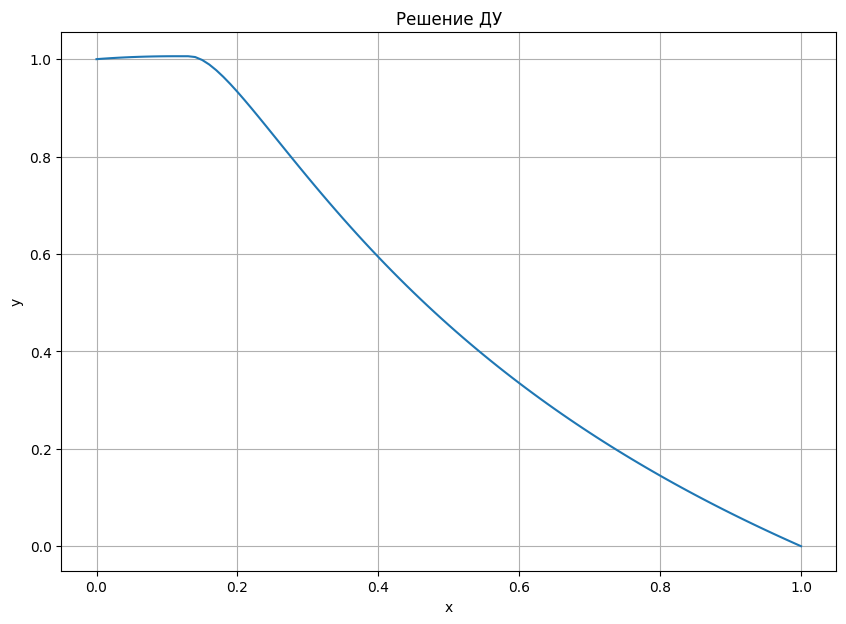

In [5]:
fig, ax = plt.subplots(figsize=(10, 7))
main.draw(main.solve_linalg(A, f), x, ax)
plt.show()

Таким образом результат, полученный методом встречной прогонки, совпадает с библиотечным решением. 